In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [63]:
df=pd.read_csv("loan_approval_data.csv")
df.drop("ApplicantID",axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,3+,Graduate,Yes,11435,3655,699,180,1,Urban,0
1,Female,No,2,Not Graduate,Yes,6998,7938,164,300,1,Urban,1
2,Male,Yes,1,Graduate,No,2162,9101,283,240,1,Rural,0
3,Male,Yes,0,Graduate,Yes,3974,187,589,180,1,Urban,0
4,Male,No,3+,Graduate,Yes,21675,5409,60,360,0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Male,No,3+,Not Graduate,No,10605,4733,220,300,1,Urban,1
796,Male,No,3+,Not Graduate,No,4014,7081,208,120,0,Semiurban,0
797,Male,Yes,2,Graduate,No,3381,8690,250,360,1,Rural,1
798,Male,No,2,Graduate,No,3098,7117,536,120,1,Rural,0


In [64]:
for i in df.select_dtypes(include="object").columns:
    df[i]=LabelEncoder().fit_transform(df[i])
df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,3,0,1,11435,3655,699,180,1,2,0
1,0,0,2,1,1,6998,7938,164,300,1,2,1
2,1,1,1,0,0,2162,9101,283,240,1,0,0
3,1,1,0,0,1,3974,187,589,180,1,2,0
4,1,0,3,0,1,21675,5409,60,360,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,0,3,1,0,10605,4733,220,300,1,2,1
796,1,0,3,1,0,4014,7081,208,120,0,1,0
797,1,1,2,0,0,3381,8690,250,360,1,0,1
798,1,0,2,0,0,3098,7117,536,120,1,0,0


In [65]:
x=df[["LoanAmount","Loan_Amount_Term"]]
y=df["Loan_Status"]

In [66]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[ 1.80423183, -0.77369841],
       [-1.13854537,  0.67246684],
       [-0.48398371, -0.05061578],
       ...,
       [-0.66550081,  1.39554946],
       [ 0.90764737, -1.49678103],
       [ 1.29268364,  0.67246684]])

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

accuracy for kernal linear:73.75%


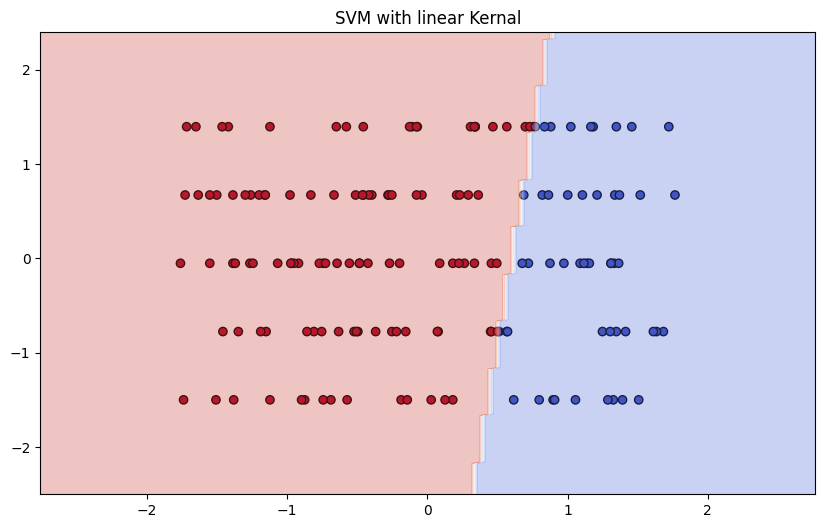

accuracy for kernal poly:71.88%


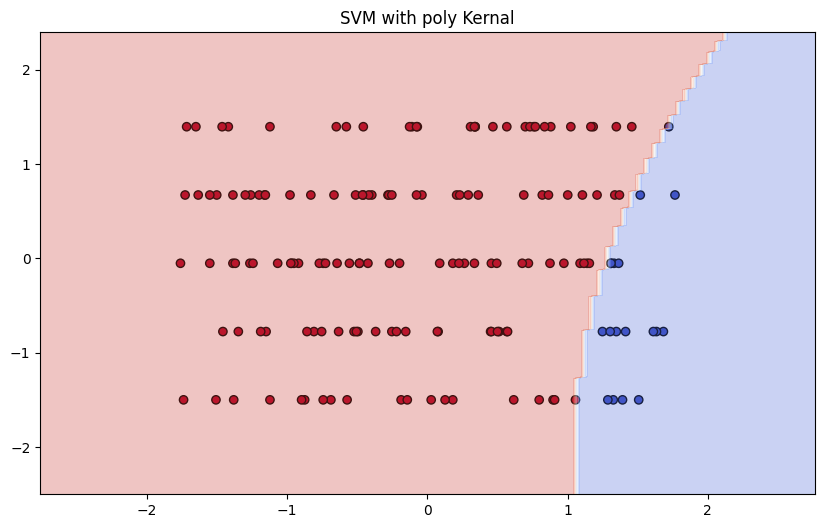

accuracy for kernal rbf:74.38%


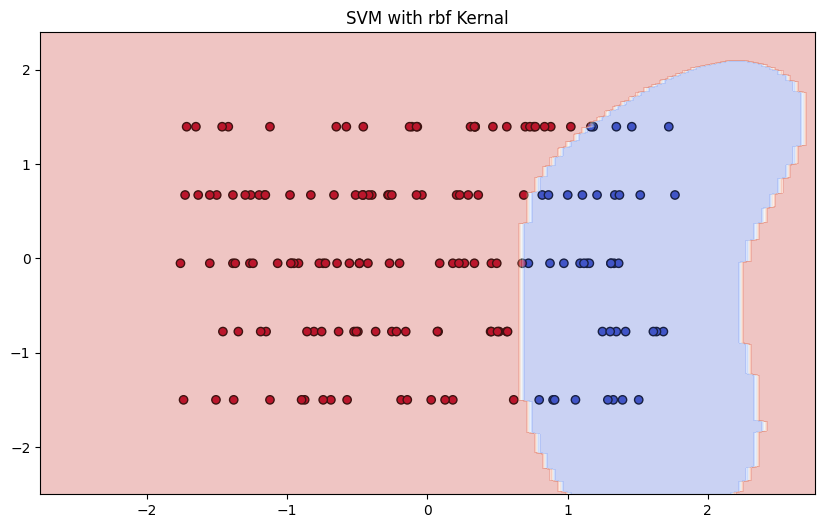

accuracy for kernal sigmoid:61.88%


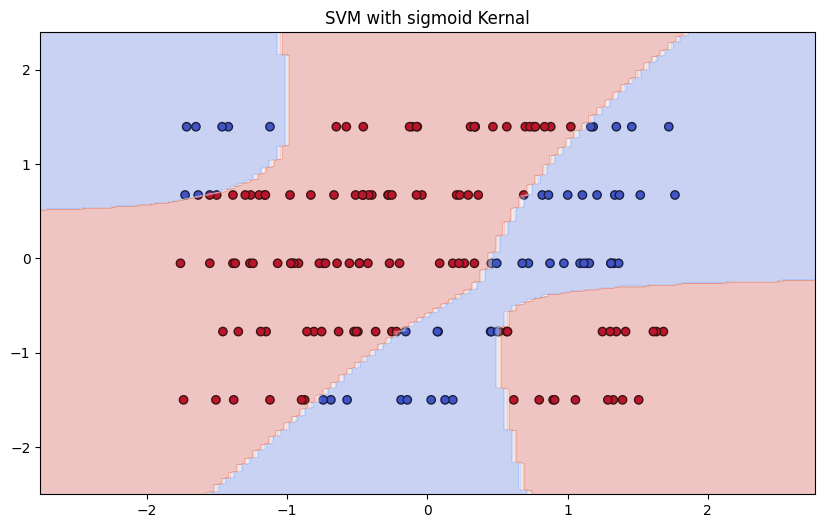

In [68]:
kernal=['linear','poly','rbf','sigmoid']
for i in kernal:
  model=SVC(kernel=i,degree=3,gamma="auto")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"accuracy for kernal {i}:{accuracy*100:.2f}%")
  plt.figure(figsize=(10,6))
  plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,cmap='coolwarm',edgecolors='k')
  x_min,x_max=x_test[:,0].min()-1,x_test[:,0].max()+1
  y_min,y_max=x_test[:,1].min()-1,x_test[:,1].max()+1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,300))
  z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3,cmap='coolwarm')
  plt.title(f'SVM with {i} Kernal')

  plt.show()

In [69]:
new_data=pd.DataFrame({"LoanAmount":[1000],"Loan_Amount_Term":[360]})
predict=model.predict(scalar.transform(new_data))
predict

array([0])